In [6]:
import pandas as pd
import numpy as np

In [7]:
# Data: https://www.kaggle.com/datasets/natedir/diamonds

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
diamond_df = pd.read_csv('F:/My Drive/diamondPricePredict/data/diamonds.csv')

In [10]:
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamond_df = diamond_df.drop(['Unnamed: 0'], axis=1)

In [12]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
diamond_df.shape

(53940, 10)

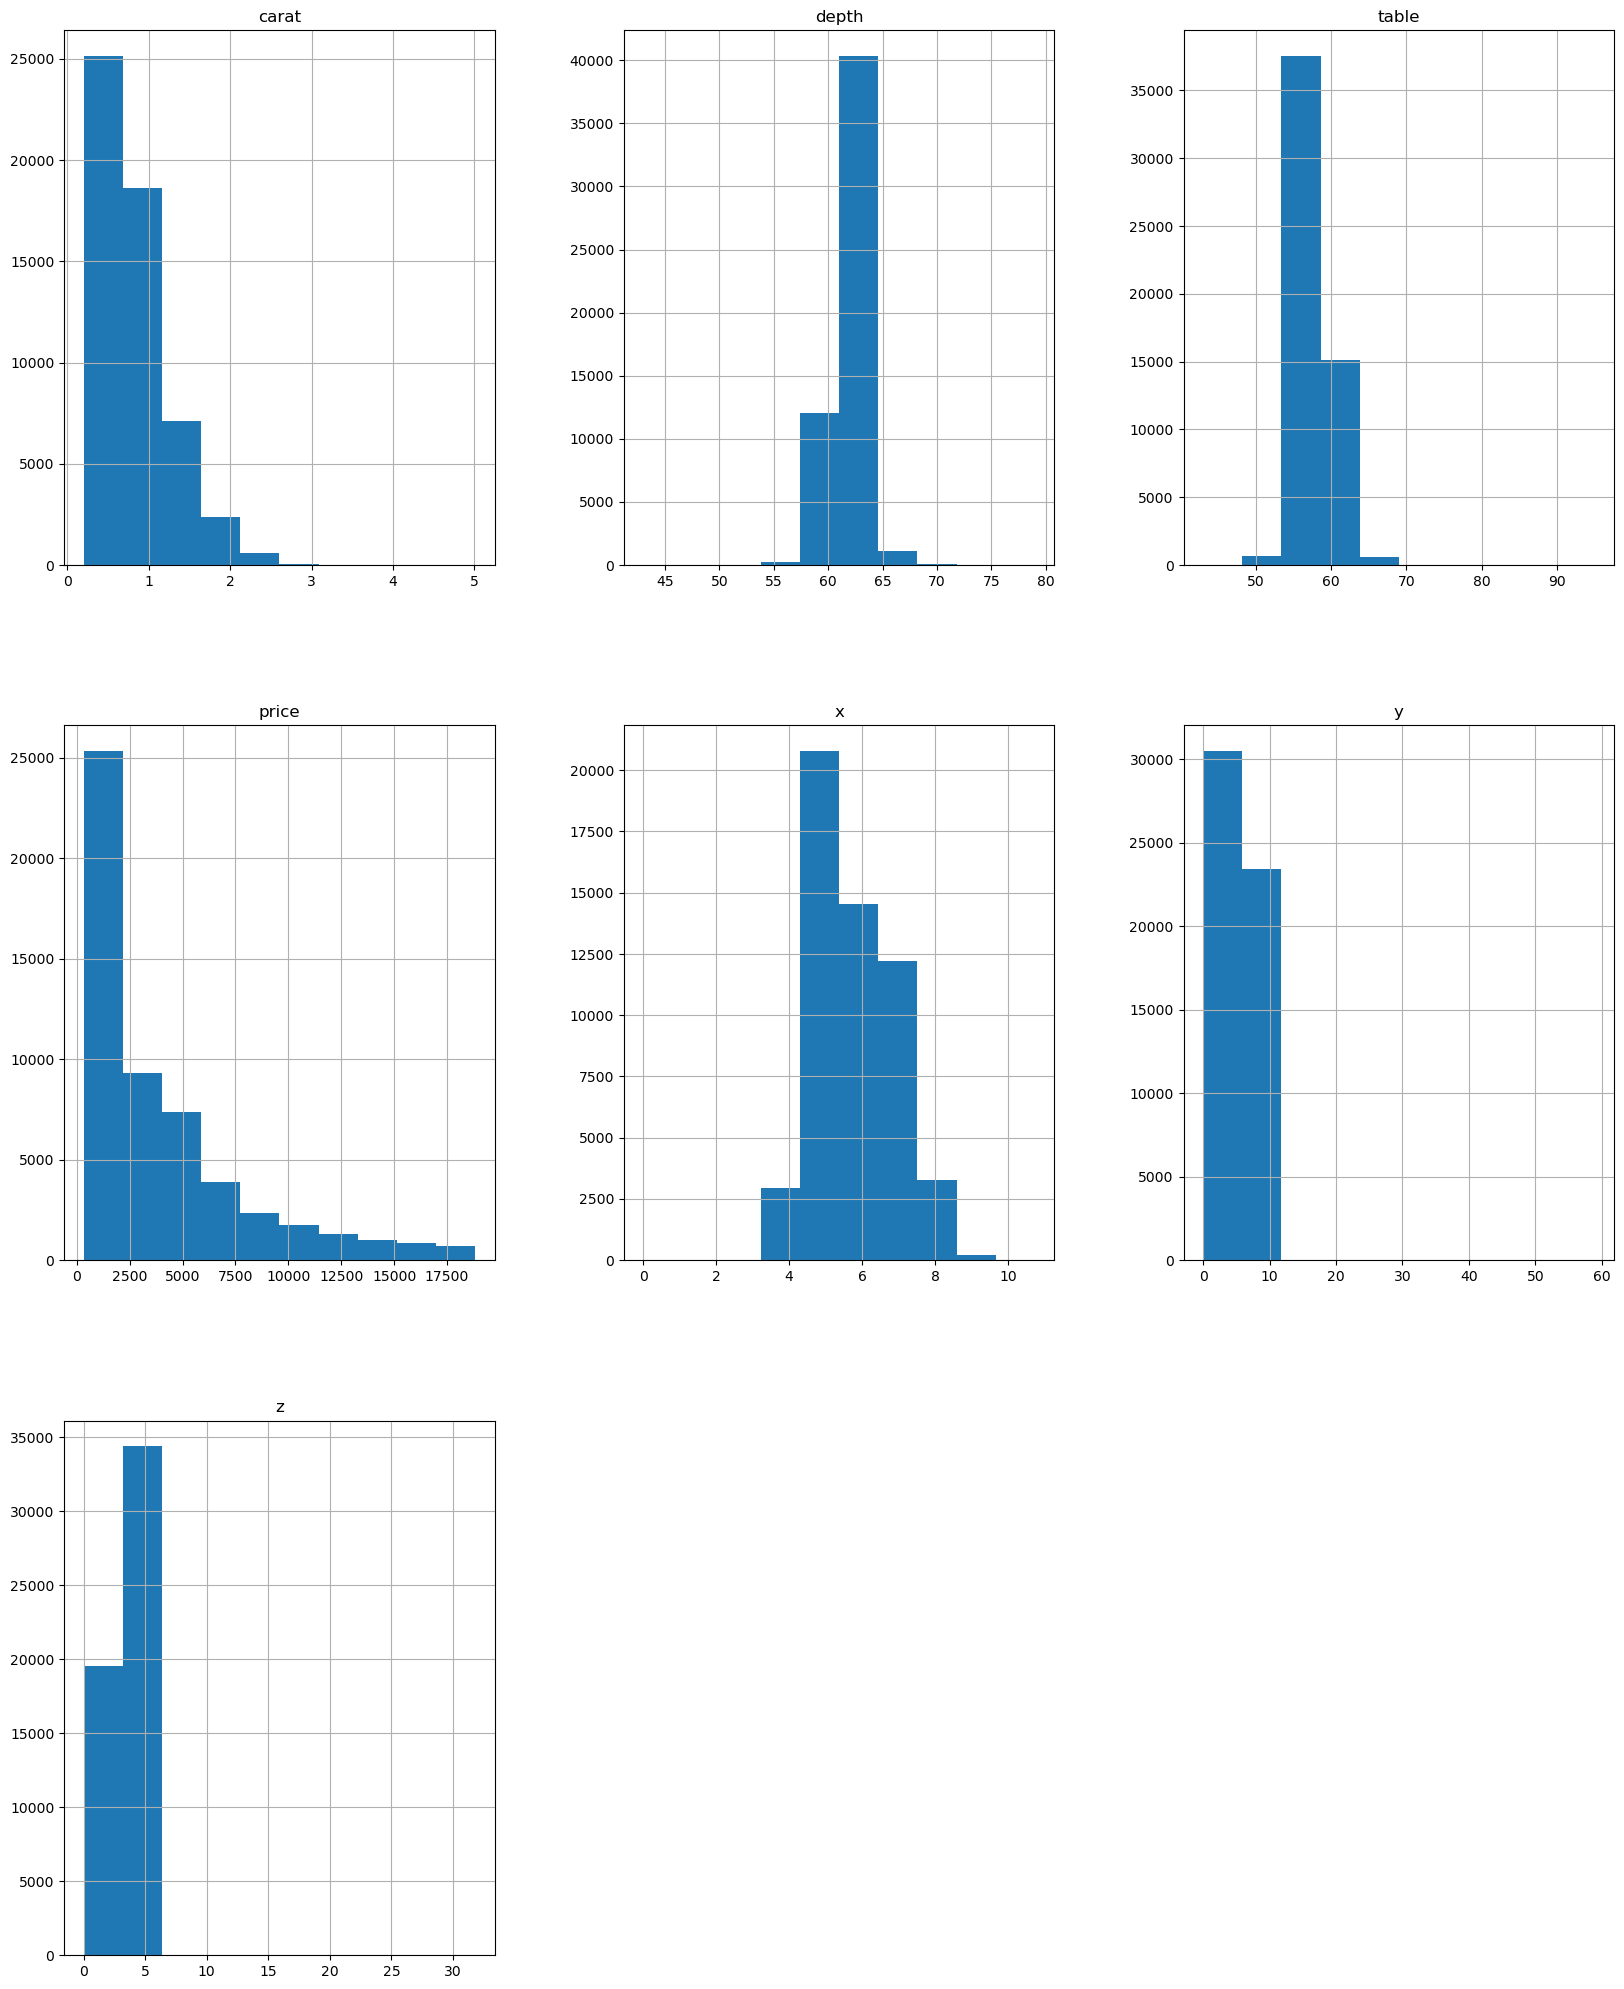

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

diamond_df.hist(figsize=(20,25));

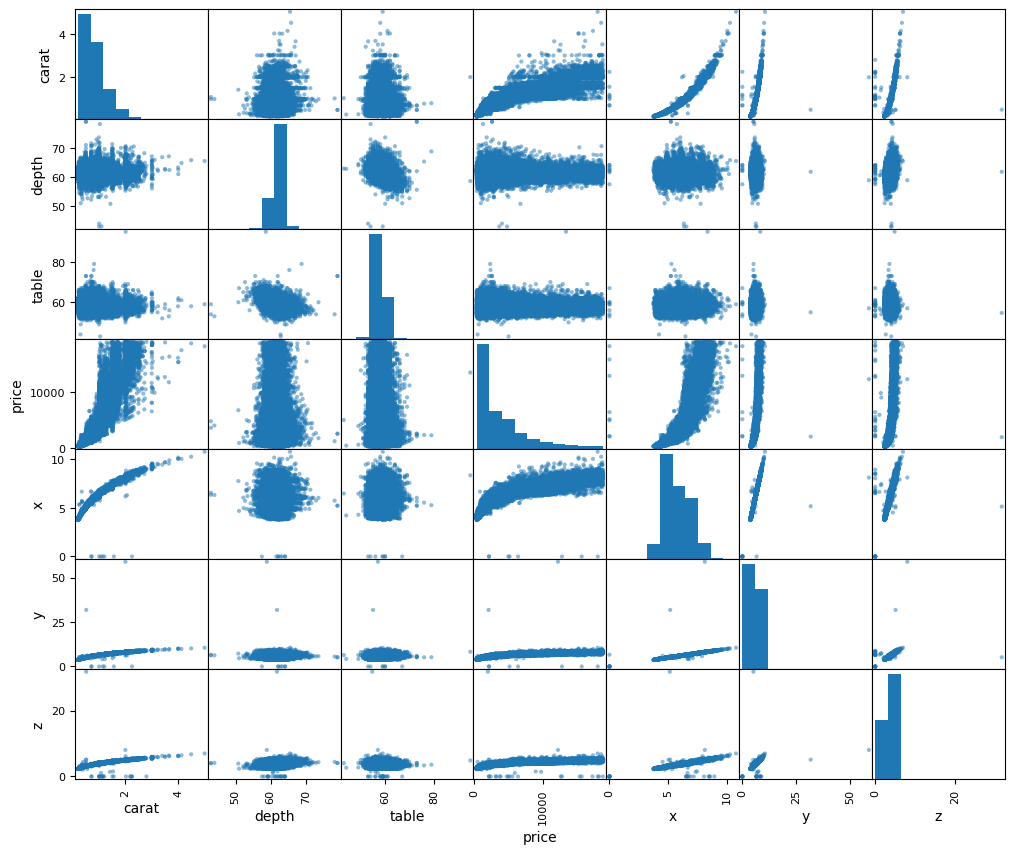

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamond_df, figsize=(12,10));

In [17]:
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

In [18]:
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

In [19]:
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

In [20]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

In [22]:
#Loại bỏ 1% giá trị lớn hơn phân vị 99%
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [23]:
diamond_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,2,4,59.4,61.0,338,4.00,4.05,2.39
10,0.30,1,0,2,64.0,55.0,339,4.25,4.28,2.73


In [24]:
X = diamond_df.drop(['price'], axis=1)
y = diamond_df['price']

In [25]:
X_arr = X.to_numpy()
y_arr  = y.to_numpy()

In [26]:
print(X_arr.shape)
print(y_arr.shape)

(51130, 9)
(51130,)


In [27]:
X_train = X_arr[:int(X_arr.shape[0]*0.8)]
y_train = y_arr[:int(X_arr.shape[0]*0.8)]
X_test = X_arr[int(X_arr.shape[0]*0.8):]
y_test = y_arr[int(X_arr.shape[0]*0.8):]

In [28]:
xmean =  X_train.mean(axis = 0)
xstd = X_train.std(axis=0)
X_train = (X_train - xmean)/xstd
X_test = (X_test -  xmean)/xstd

In [29]:
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [30]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(40904, 10) (40904,) (10226, 10) (10226,)


In [31]:
N = X_train.shape[0]
n_epochs = 1000
m = 1000
learning_rate = 0.001

# khởi tạo giá trị tham số
theta = np.random.randn(10, 1)
losses = []

for epoch in range(n_epochs):
    for i in range(0, N, m):
        # lấy 1 sample
        x = X_train[i:i+m, :]
        y = y_train[i:i+m]
        y = y[:, np.newaxis]

        # predict y_hat
        y_hat = x.dot(theta)

        # compute loss
        loss = np.multiply((y_hat-y), (y_hat-y))
        losses.append(np.mean(loss))

        # compute gradient
        k = 2*(y_hat-y)
        gradients = x.T.dot(k)

        # update weights
        theta = theta - learning_rate*(gradients/m)

    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {losses[-1]}")

Epoch 1/1000 - Loss: 2386381.008413052
Epoch 2/1000 - Loss: 2782459.1536347326
Epoch 3/1000 - Loss: 2910970.7363068657
Epoch 4/1000 - Loss: 2839999.7505980106
Epoch 5/1000 - Loss: 2644062.164121599
Epoch 6/1000 - Loss: 2383489.9272854803
Epoch 7/1000 - Loss: 2100865.5502362577
Epoch 8/1000 - Loss: 1823461.6109977898
Epoch 9/1000 - Loss: 1567095.1075623299
Epoch 10/1000 - Loss: 1339688.3106263375
Epoch 11/1000 - Loss: 1144052.2831762386
Epoch 12/1000 - Loss: 979885.4224217254
Epoch 13/1000 - Loss: 845131.534847024
Epoch 14/1000 - Loss: 736863.5869058133
Epoch 15/1000 - Loss: 651835.5297194584
Epoch 16/1000 - Loss: 586810.7673820374
Epoch 17/1000 - Loss: 538744.9763536467
Epoch 18/1000 - Loss: 504876.70250004367
Epoch 19/1000 - Loss: 482761.4195604027
Epoch 20/1000 - Loss: 470272.32790817885
Epoch 21/1000 - Loss: 465582.7532591456
Epoch 22/1000 - Loss: 467139.41530400375
Epoch 23/1000 - Loss: 473632.1915038945
Epoch 24/1000 - Loss: 483963.6636226593
Epoch 25/1000 - Loss: 497220.260435630

In [32]:
# Đánh giá trên tập test
test_predictions = X_test.dot(theta)
li = np.mean((test_predictions - y_test)*(test_predictions - y_test))
print(f"MSE: {li}")

MSE: 1537533.4882728031


In [33]:
li = np.mean(np.abs(test_predictions - y_test))
print(f"MAE: {li}")

MAE: 955.1285346878207


In [34]:
np.savez('weight.npz', x_mean = xmean, x_std =xstd, theta =theta)

In [35]:
np.savez('data.npz', X_train = X_train, y_train =y_train, X_test = X_test, y_test = y_test)
